In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

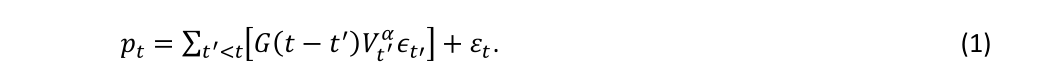

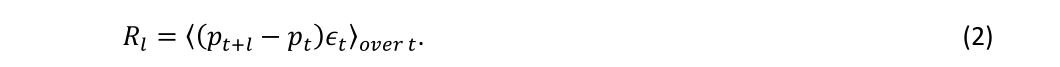

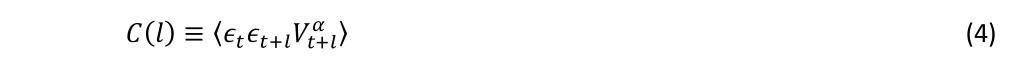

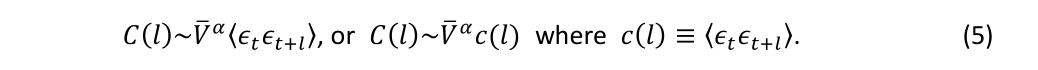

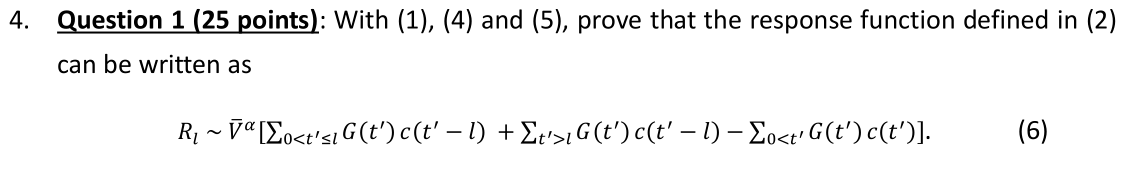

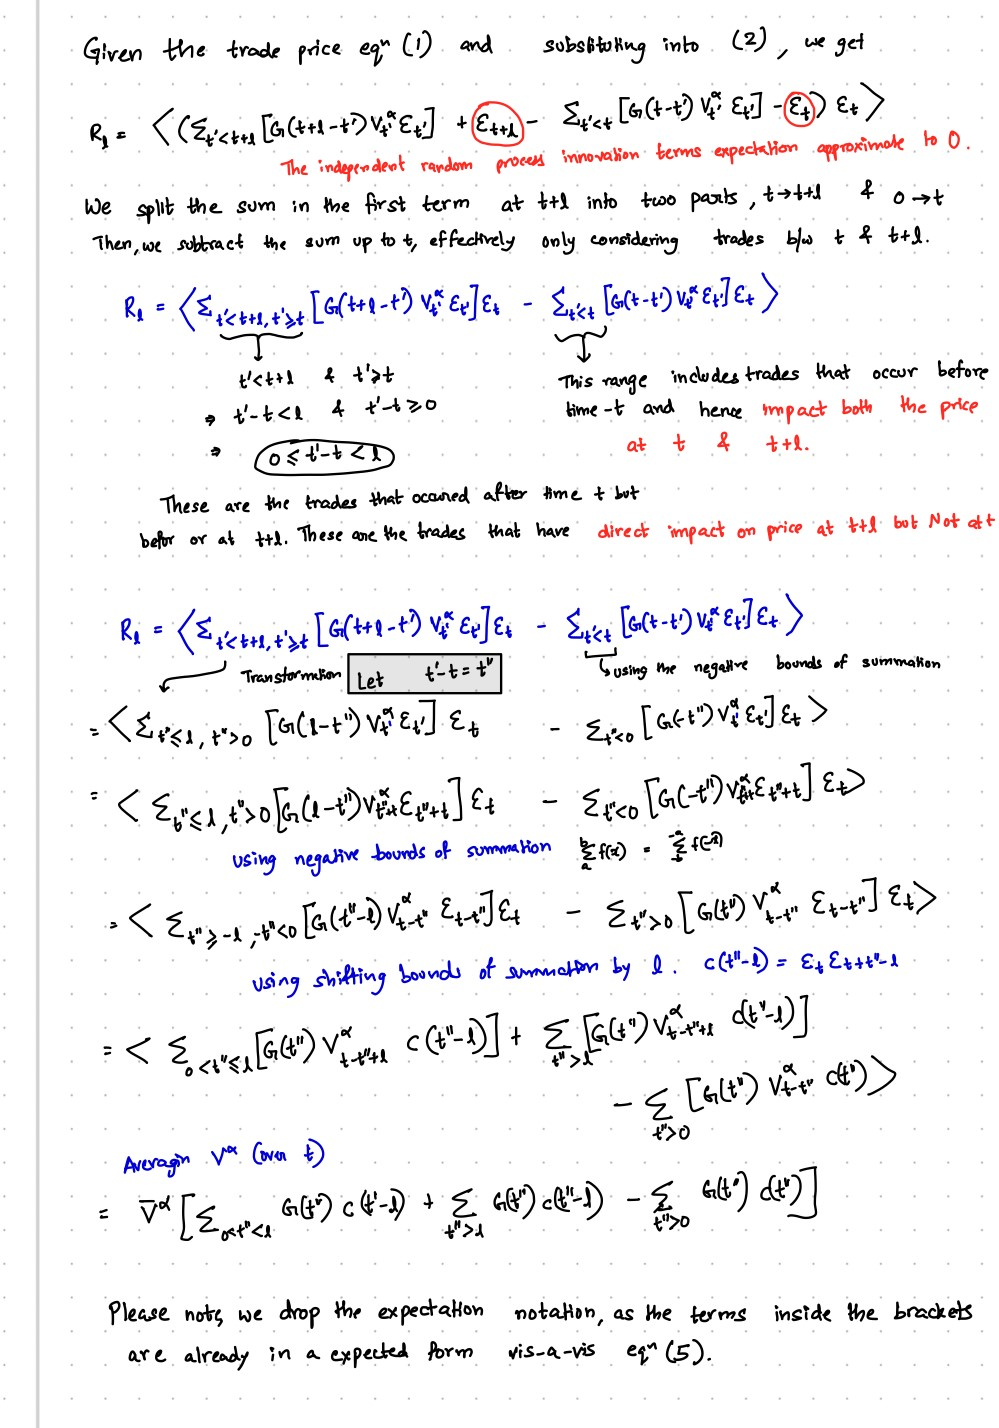

---

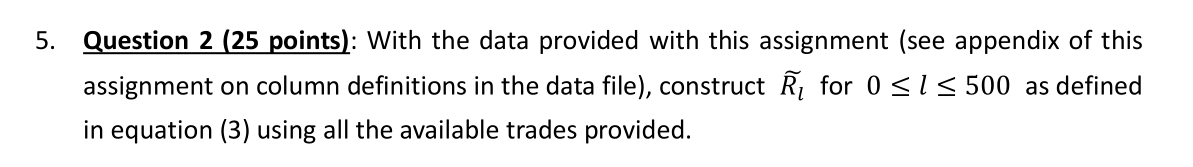

In [3]:
df1 = pd.read_csv('pp1_md_201607_201607.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)

df2 = pd.read_csv('pp1_md_201608_201608.csv')
df2.drop("Unnamed: 0", axis=1, inplace=True)


In [4]:
df1

,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,20160701,90100020,48.0,5267.916667,-1.0,5268.0,5266.0,5270.0
1,20160701,90100270,42.0,5266.571429,-1.0,5268.0,5266.0,5270.0
2,20160701,90100518,72.0,5268.444444,1.0,5267.0,5266.0,5268.0
3,20160701,90100762,326.0,5270.000000,1.0,5268.0,5266.0,5270.0
4,20160701,90101019,6.0,5268.666667,-1.0,5270.0,5268.0,5272.0
...,...,...,...,...,...,...,...,...
397872,20160729,145858666,44.0,4996.000000,1.0,4995.0,4994.0,4996.0
397873,20160729,145858902,56.0,4996.000000,1.0,4995.0,4994.0,4996.0
397874,20160729,145859425,6.0,4995.333333,1.0,4995.0,4994.0,4996.0
397875,20160729,145859636,4.0,4996.000000,1.0,4995.0,4994.0,4996.0


In [5]:
df2

,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,20160801,90100221,10.0,5084.000000,-1.0,5085.0,5084.0,5086.0
1,20160801,90100407,20.0,5086.000000,1.0,5085.0,5084.0,5086.0
2,20160801,90100745,16.0,5086.000000,1.0,5085.0,5084.0,5086.0
3,20160801,90100962,12.0,5085.666667,1.0,5085.0,5084.0,5086.0
4,20160801,90101246,28.0,5085.571429,1.0,5085.0,5084.0,5086.0
...,...,...,...,...,...,...,...,...
506306,20160831,145858815,44.0,5346.000000,-1.0,5347.0,5346.0,5348.0
506307,20160831,145859065,38.0,5347.263158,1.0,5347.0,5346.0,5348.0
506308,20160831,145859324,4.0,5346.000000,-1.0,5347.0,5346.0,5348.0
506309,20160831,145859572,4.0,5347.000000,0.0,5347.0,5346.0,5348.0


In [6]:
#Concatenate the dataframes
df = pd.concat([df1, df2], ignore_index=True)
df

,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,20160701,90100020,48.0,5267.916667,-1.0,5268.0,5266.0,5270.0
1,20160701,90100270,42.0,5266.571429,-1.0,5268.0,5266.0,5270.0
2,20160701,90100518,72.0,5268.444444,1.0,5267.0,5266.0,5268.0
3,20160701,90100762,326.0,5270.000000,1.0,5268.0,5266.0,5270.0
4,20160701,90101019,6.0,5268.666667,-1.0,5270.0,5268.0,5272.0
...,...,...,...,...,...,...,...,...
904183,20160831,145858815,44.0,5346.000000,-1.0,5347.0,5346.0,5348.0
904184,20160831,145859065,38.0,5347.263158,1.0,5347.0,5346.0,5348.0
904185,20160831,145859324,4.0,5346.000000,-1.0,5347.0,5346.0,5348.0
904186,20160831,145859572,4.0,5347.000000,0.0,5347.0,5346.0,5348.0


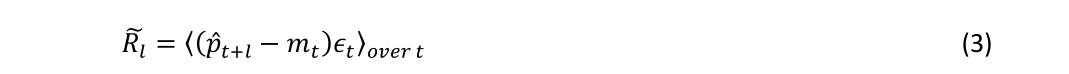

In [25]:
# Function to calculate Rl_tilde for a given lag l
def calculate_Rl_tilde(df, l):
    vwap_t_l = df['VWAP'].shift(-l)   # Shift VWAP backwards by l
    mt = df['midQ']                   # mid-quote at time t
    epsilon_t = df['Sign']            # sign at time t

    Rl_tilde_values = (vwap_t_l - mt) * epsilon_t
    Rl_tilde_values.dropna(inplace=True)  # Drop NaN values resulting from the shift operation

    # Divide by the bid-ask spread (assuming bid and ask prices are available)
    bid_ask_spread = df['SP1'] - df['BP1']
    Rl_tilde_values /= bid_ask_spread

    return Rl_tilde_values.mean()

# Calculate Rl_tilde for 0 <= l <= 500
Rl_tilde_results = [calculate_Rl_tilde(df, l) for l in range(501)]

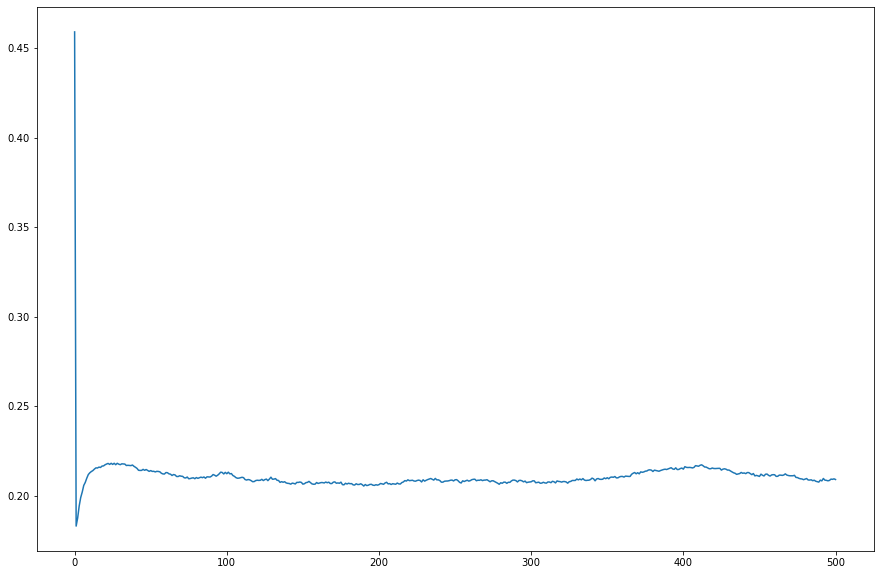

In [8]:
#PLot Rl_tilde_results against l and change the figure size
plt.figure(figsize=(15,10))
plt.plot(Rl_tilde_results)
plt.show()

---

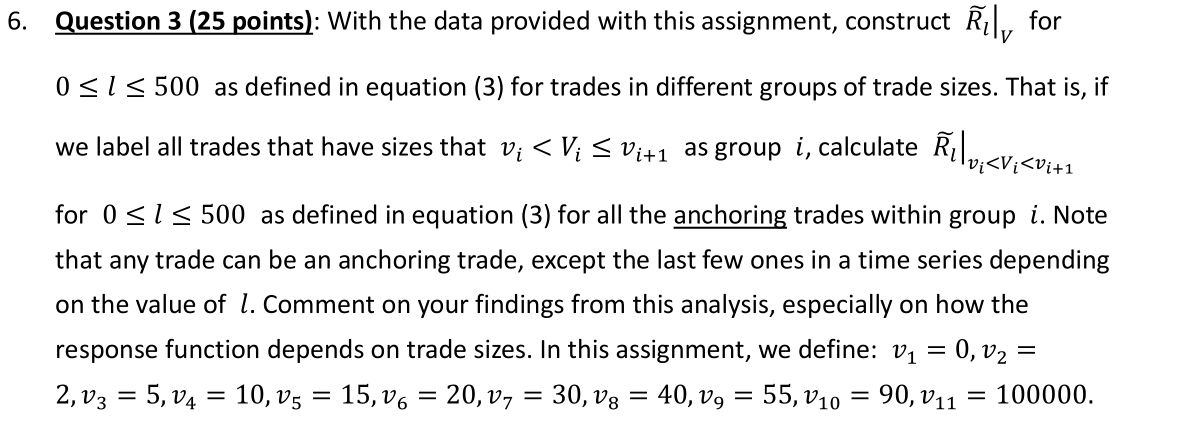

In [9]:
def calculate_average_Rl_tilde_by_size(df, max_l):
    # Define trade size categories
    size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]
    #add 1 to each element in the list
    size_categories = [x+0.1 for x in size_categories]
    size_categories

    # Create a new column to represent trade size groups
    df['TradeSizeGroup'] = pd.cut(df['Size'], bins=size_categories, labels=False, right=False)

    average_Rl_tilde_results_by_size = {}

    for size_group in df['TradeSizeGroup'].unique():
        group_df = df[df['TradeSizeGroup'] == size_group]

        # Calculate Rl_tilde for each l in the range [0, max_l]
        Rl_tilde_results = [calculate_Rl_tilde(group_df, l) for l in range(max_l + 1)]

        # Save the results for each group as a dictionary entry
        average_Rl_tilde_results_by_size[size_group] = Rl_tilde_results

    return average_Rl_tilde_results_by_size

# Example usage:
max_l = 500
average_Rl_tilde_results_by_size = calculate_average_Rl_tilde_by_size(df, max_l)

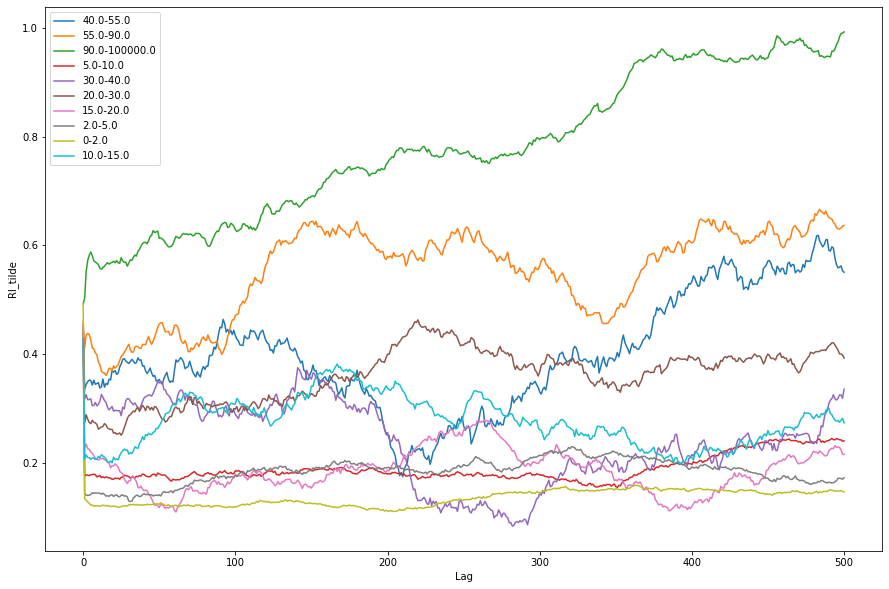

In [10]:
size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]
create_bin_tags = [str(x) + '-' + str(y) for x, y in zip(size_categories[:-1], size_categories[1:])]
plt.figure(figsize=(15,10))
#plot the results for each bin in the same figure
for size_group in average_Rl_tilde_results_by_size:
    #if size_group is nan then skip
    if np.isnan(size_group):
        continue
    plt.plot(average_Rl_tilde_results_by_size[size_group], label=create_bin_tags[int(size_group)])

plt.xlabel('Lag')
plt.ylabel('Rl_tilde')
plt.legend()
plt.show()

> We can note that higher the size (volume) of a trade cluster the higher is the impact and the response of the market to the trade cluster.When a large trade is executed, it can lead to price movements, affecting the VWAP and mid-quotes. The larger the trade size, the more likely it is to cause noticeable market impact.
> >
> Larger trades may also have a more pronounced impact on the bid-ask spread. The bid-ask spread is use in calculating response functions. If larger trades widen the spread or cause temporary imbalances in supply and demand, the response function may show a higher value.

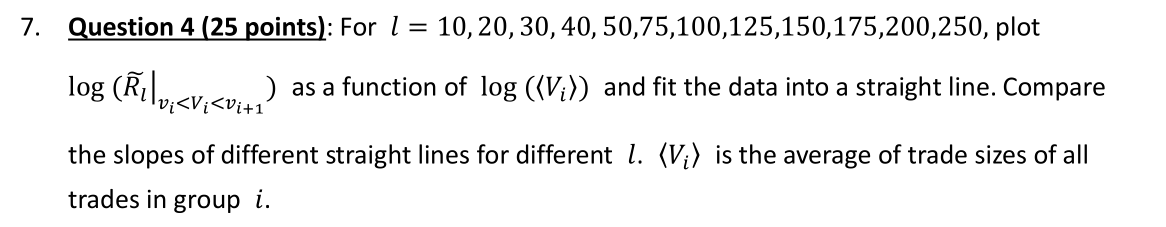

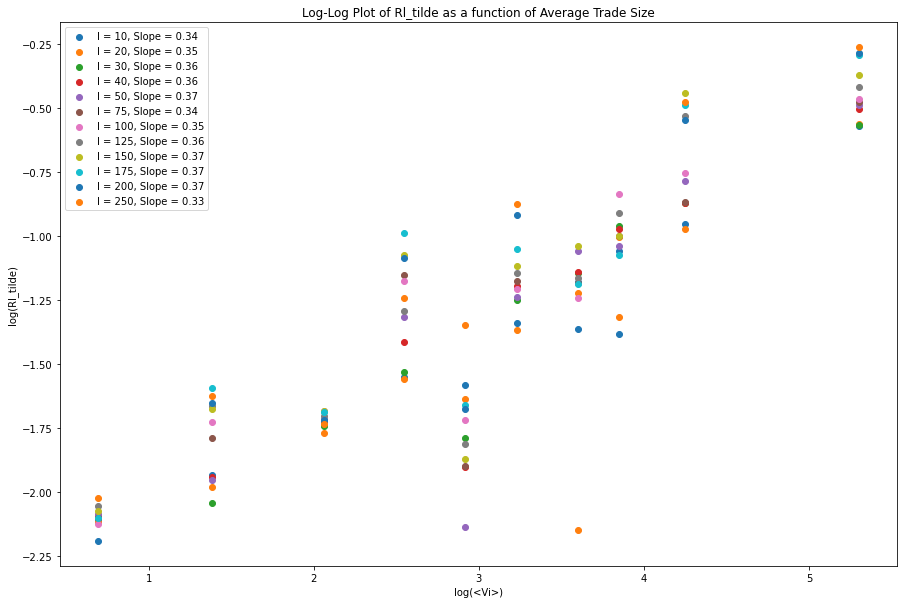

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to fit a line to the data and return the slope
def fit_line(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope

# Function to calculate log(Rl_tilde) for a given lag l and trade size group
def calculate_log_Rl_tilde(df, l):
    vwap_t_l = df['VWAP'].shift(-l)
    mt = df['midQ']
    epsilon_t = df['Sign']

    Rl_tilde_values = (vwap_t_l - mt) * epsilon_t
    Rl_tilde_values.dropna(inplace=True)

    bid_ask_spread = df['SP1'] - df['BP1']
    Rl_tilde_values /= bid_ask_spread

    return np.log(Rl_tilde_values.mean())

# Function to calculate log(<Vi>) for a given trade size group
def calculate_log_average_trade_size(df):
    return np.log(df['Size'].mean())

# Plotting
lags = [10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 250]
size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]

plt.figure(figsize=(15, 10))


for l in lags:
    log_Rl_tilde_values = []
    log_average_trade_size_values = []

    for size_group in range(len(size_categories) - 1):
        group_df = df[(df['Size'] > size_categories[size_group]) & (df['Size'] <= size_categories[size_group + 1])]
        log_Rl_tilde = calculate_log_Rl_tilde(group_df, l)
        log_average_trade_size = calculate_log_average_trade_size(group_df)

        log_Rl_tilde_values.append(log_Rl_tilde)
        log_average_trade_size_values.append(log_average_trade_size)

    # Fit a line to the data
    slope = fit_line(log_average_trade_size_values, log_Rl_tilde_values)

    # Plot the data points
    plt.scatter(log_average_trade_size_values, log_Rl_tilde_values, label=f'l = {l}, Slope = {slope:.2f}')
plt.xlabel('log(<Vi>)')
plt.ylabel('log(Rl_tilde)')
plt.legend()
plt.title('Log-Log Plot of Rl_tilde as a function of Average Trade Size')
plt.show()

<Figure size 1080x720 with 0 Axes>

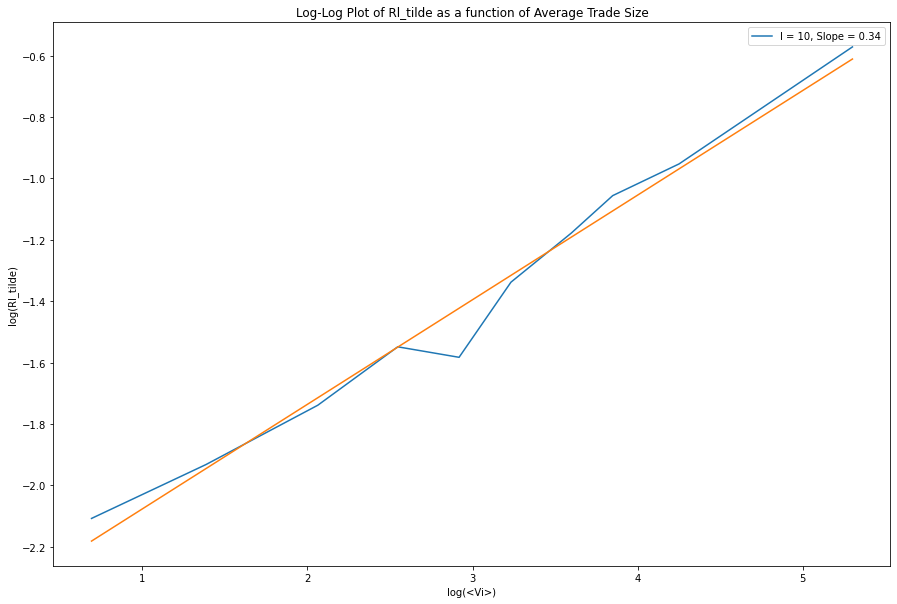

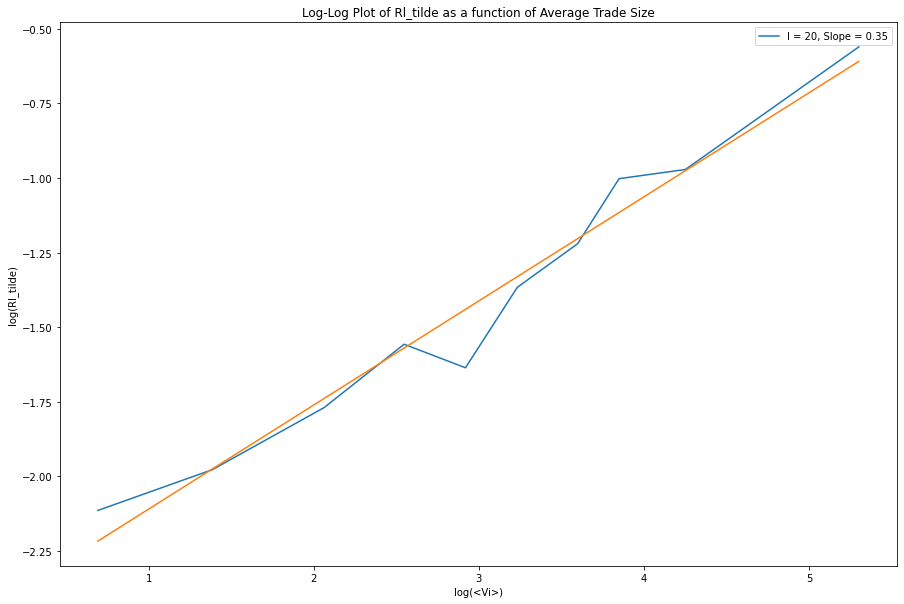

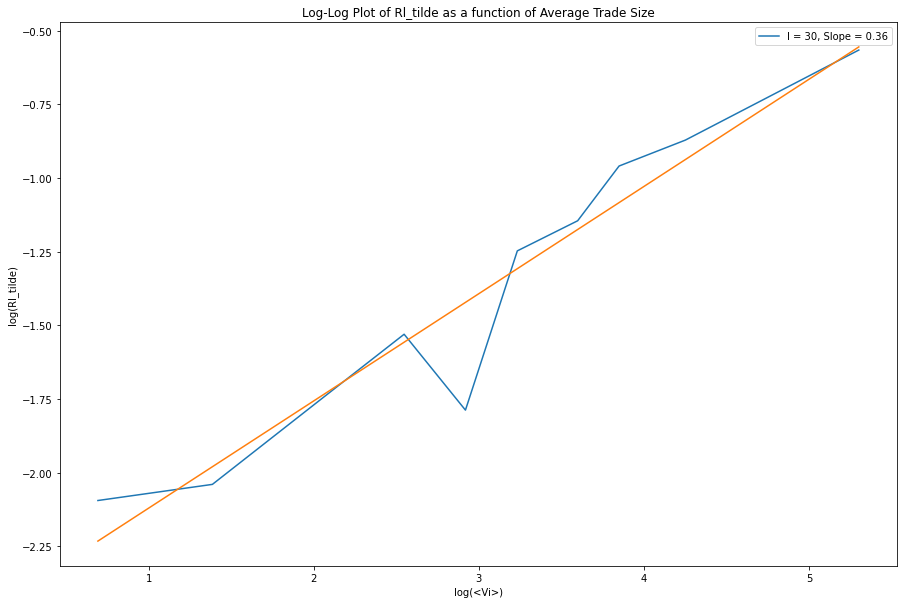

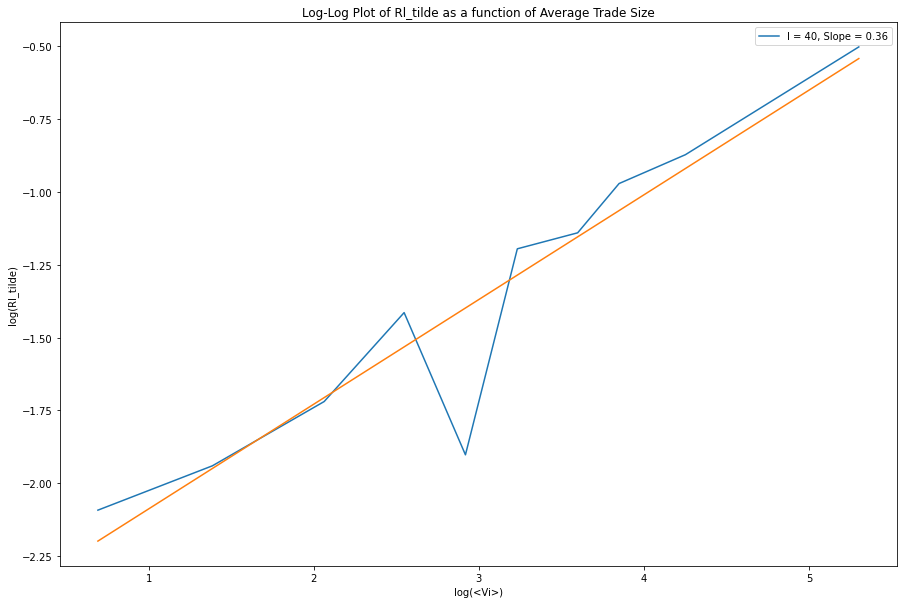

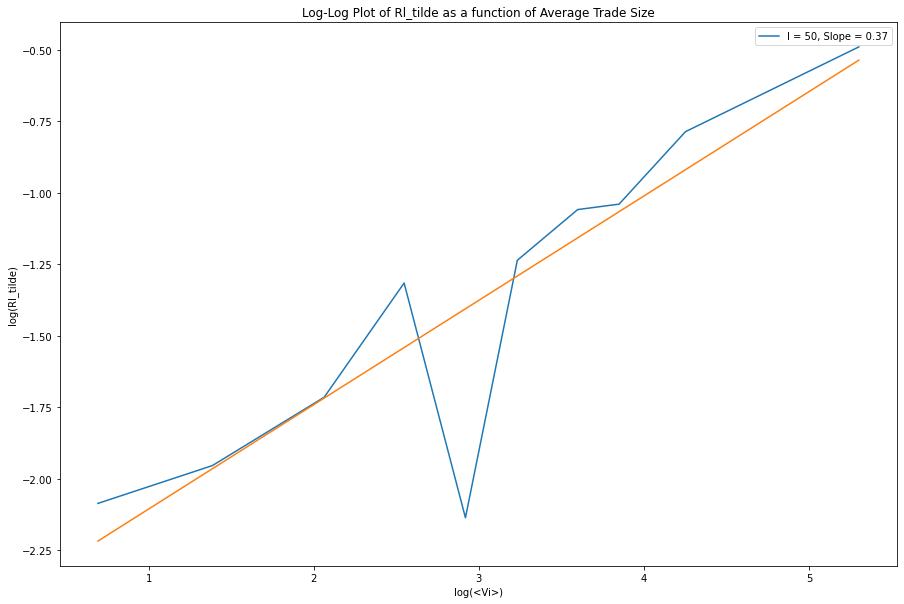

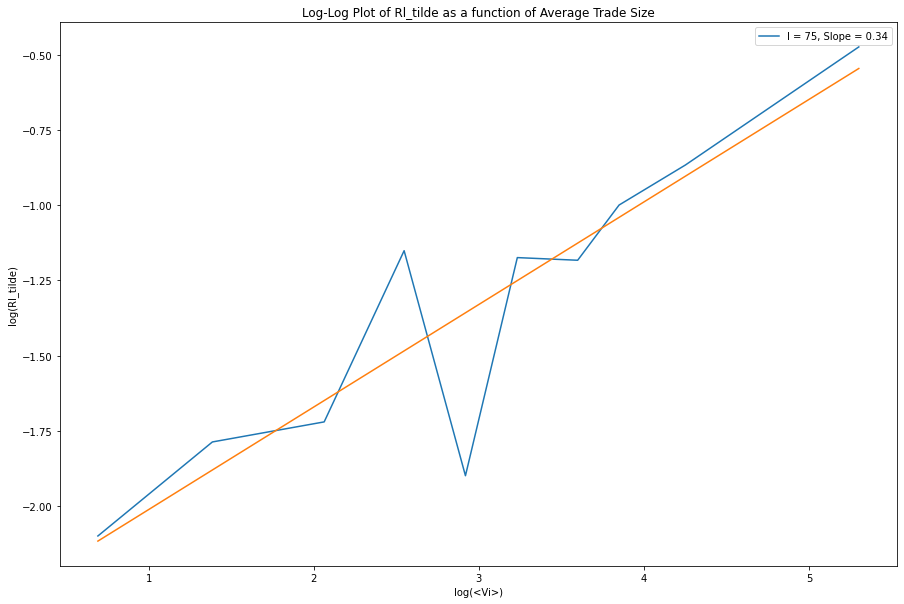

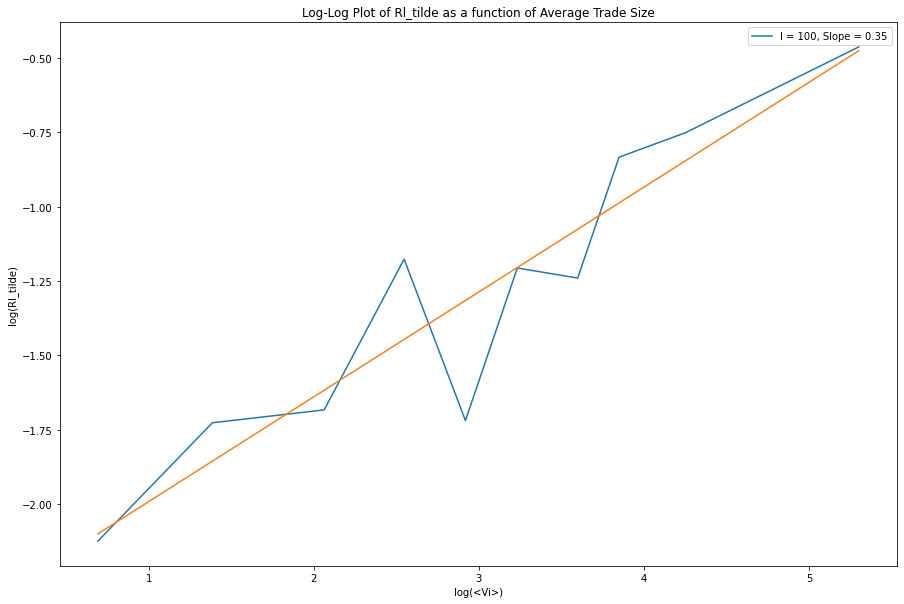

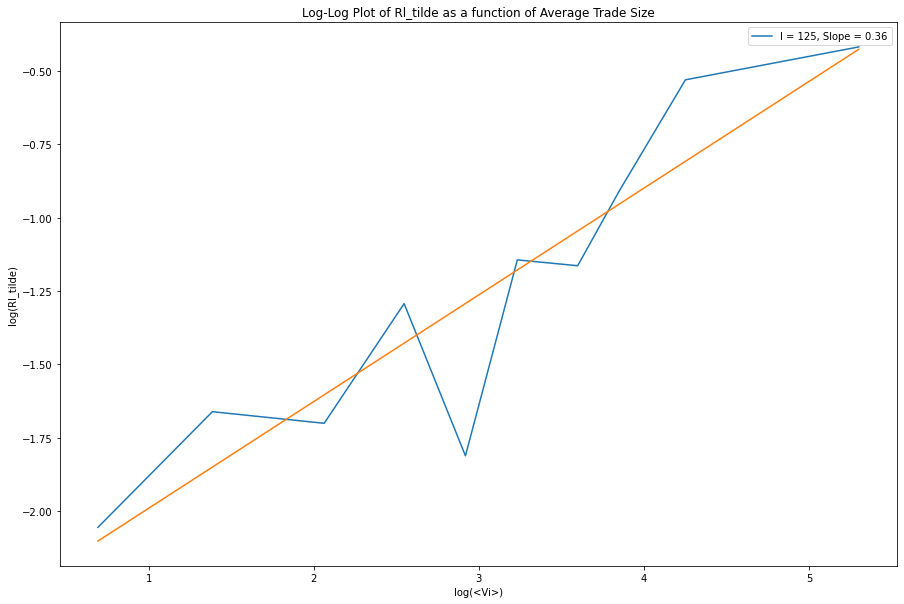

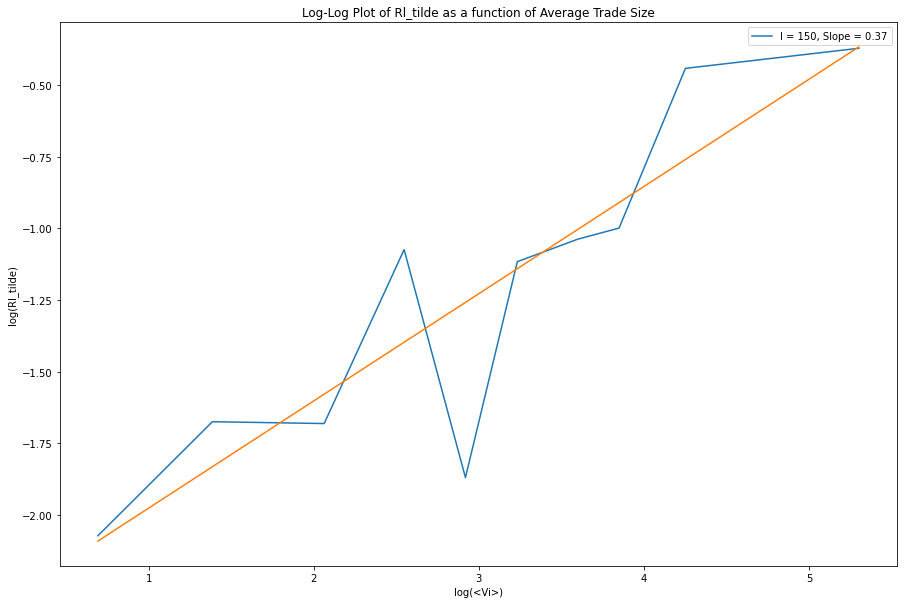

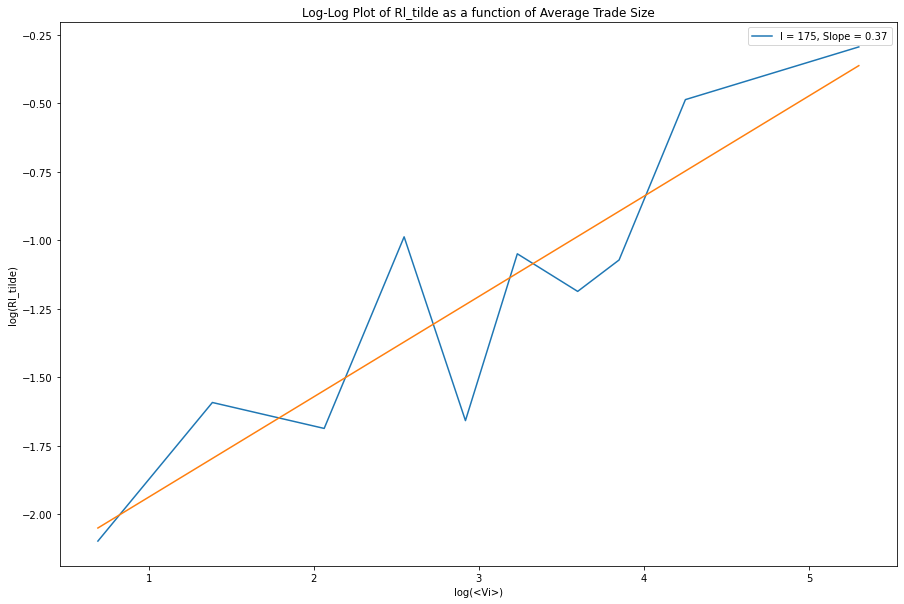

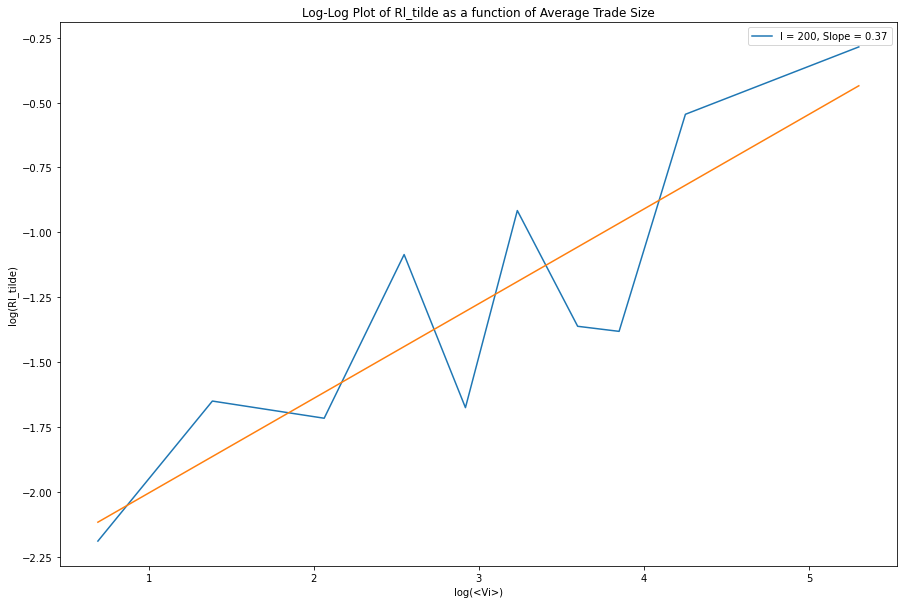

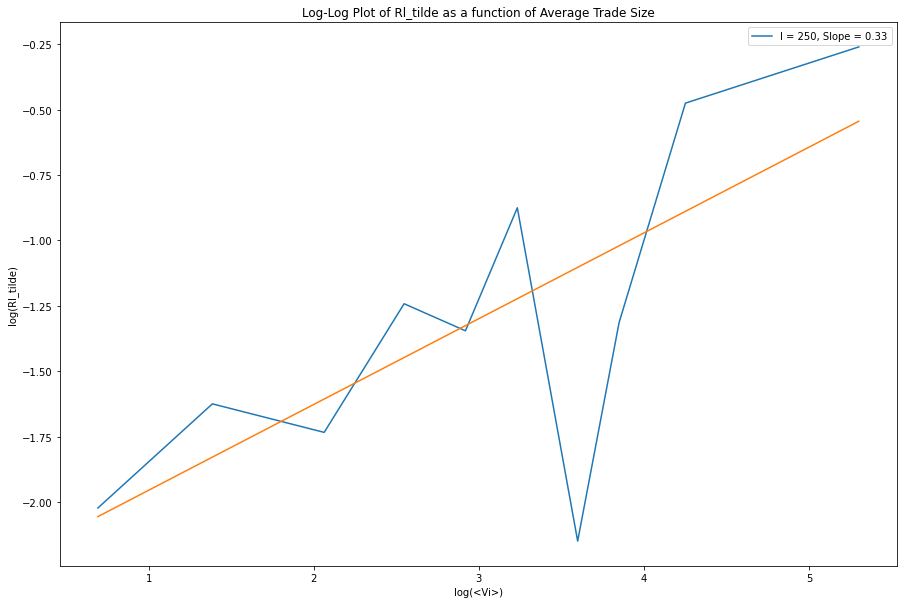

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to fit a line to the data and return the slope
def fit_line(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope

# Function to calculate log(Rl_tilde) for a given lag l and trade size group
def calculate_log_Rl_tilde(df, l):
    vwap_t_l = df['VWAP'].shift(-l)
    mt = df['midQ']
    epsilon_t = df['Sign']

    Rl_tilde_values = (vwap_t_l - mt) * epsilon_t
    Rl_tilde_values.dropna(inplace=True)

    bid_ask_spread = df['SP1'] - df['BP1']
    Rl_tilde_values /= bid_ask_spread

    return np.log(Rl_tilde_values.mean())

# Function to calculate log(<Vi>) for a given trade size group
def calculate_log_average_trade_size(df):
    return np.log(df['Size'].mean())

# Plotting
lags = [10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 250]
size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]

plt.figure(figsize=(15, 10))


for l in lags:
    log_Rl_tilde_values = []
    log_average_trade_size_values = []

    for size_group in range(len(size_categories) - 1):
        group_df = df[(df['Size'] > size_categories[size_group]) & (df['Size'] <= size_categories[size_group + 1])]
        log_Rl_tilde = calculate_log_Rl_tilde(group_df, l)
        log_average_trade_size = calculate_log_average_trade_size(group_df)

        log_Rl_tilde_values.append(log_Rl_tilde)
        log_average_trade_size_values.append(log_average_trade_size)

    # Fit a line to the data
    slope = fit_line(log_average_trade_size_values, log_Rl_tilde_values)

    # Plot the data points
    #plt.scatter(log_average_trade_size_values, log_Rl_tilde_values, label=f'l = {l}, Slope = {slope:.2f}')
    plt.figure(figsize=(15, 10))
    plt.plot(log_average_trade_size_values, log_Rl_tilde_values, label=f'l = {l}, Slope = {slope:.2f}')
    #plot a line of best fit
    plt.plot(np.unique(log_average_trade_size_values), np.poly1d(np.polyfit(log_average_trade_size_values, log_Rl_tilde_values, 1))(np.unique(log_average_trade_size_values)))
    plt.xlabel('log(<Vi>)')
    plt.ylabel('log(Rl_tilde)')
    plt.legend()
    plt.title('Log-Log Plot of Rl_tilde as a function of Average Trade Size')
    plt.show()



#### IN the TA session it was mentioned it is better practice to plot the slopes in the same graph as the response function. I have done that in the next cell.

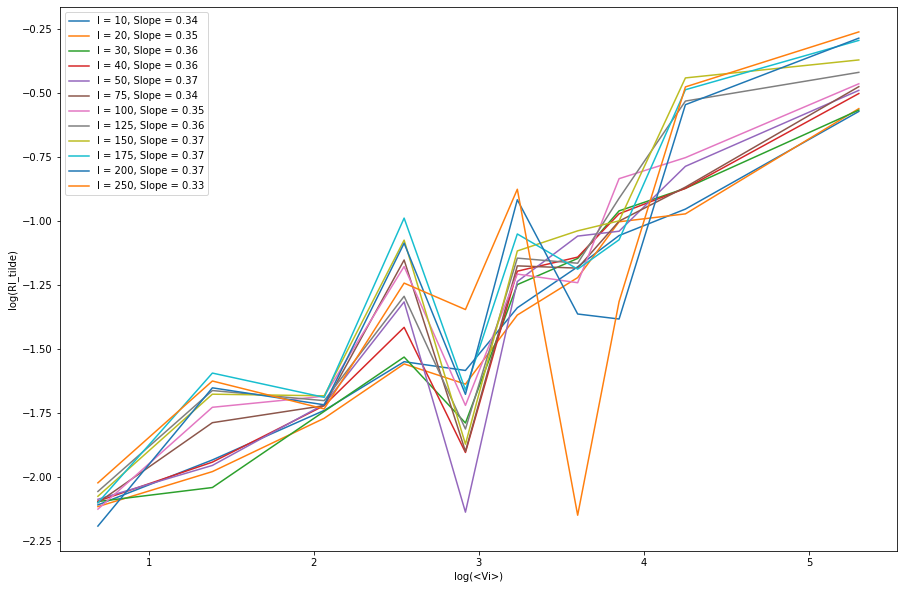

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

#save the slope values
slope_values = []

# Function to fit a line to the data and return the slope
def fit_line(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope

# Function to calculate log(Rl_tilde) for a given lag l and trade size group
def calculate_log_Rl_tilde(df, l):
    vwap_t_l = df['VWAP'].shift(-l)
    mt = df['midQ']
    epsilon_t = df['Sign']

    Rl_tilde_values = (vwap_t_l - mt) * epsilon_t
    Rl_tilde_values.dropna(inplace=True)

    bid_ask_spread = df['SP1'] - df['BP1']
    Rl_tilde_values /= bid_ask_spread

    return np.log(Rl_tilde_values.mean())

# Function to calculate log(<Vi>) for a given trade size group
def calculate_log_average_trade_size(df):
    return np.log(df['Size'].mean())

# Plotting
lags = [10, 20, 30, 40, 50, 75, 100, 125, 150, 175, 200, 250]
size_categories = [0, 2.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 55.0, 90.0, 100000.0]

plt.figure(figsize=(15, 10))


for l in lags:
    log_Rl_tilde_values = []
    log_average_trade_size_values = []

    for size_group in range(len(size_categories) - 1):
        group_df = df[(df['Size'] > size_categories[size_group]) & (df['Size'] <= size_categories[size_group + 1])]
        log_Rl_tilde = calculate_log_Rl_tilde(group_df, l)
        log_average_trade_size = calculate_log_average_trade_size(group_df)

        log_Rl_tilde_values.append(log_Rl_tilde)
        log_average_trade_size_values.append(log_average_trade_size)

    # Fit a line to the data
    slope = fit_line(log_average_trade_size_values, log_Rl_tilde_values)
    #save the slope values
    slope_values.append(slope)
    
    # Plot the data points
    #plt.scatter(log_average_trade_size_values, log_Rl_tilde_values, label=f'l = {l}, Slope = {slope:.2f}')
    plt.plot(log_average_trade_size_values, log_Rl_tilde_values, label=f'l = {l}, Slope = {slope:.2f}')
    
    
#show the plot in the same figure
plt.xlabel('log(<Vi>)')
plt.ylabel('log(Rl_tilde)')
plt.legend()
    



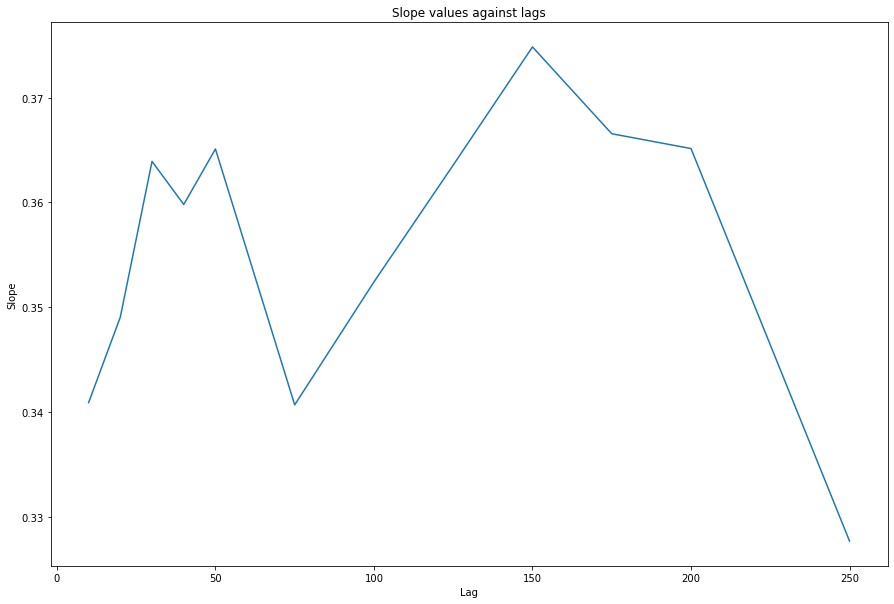

In [14]:
#plot the slope values against lags
plt.figure(figsize=(15, 10))
plt.plot(lags, slope_values)
plt.xlabel('Lag')
plt.ylabel('Slope')
plt.title('Slope values against lags')
plt.show()

> Comparing the slopes we see that the slopes are reducing with the lag. But, more interestingly the R^2 values reduce as we increase the size of the lag. We see more variantion with the log<V> (size) with a higher lag compared to shorter lags. 

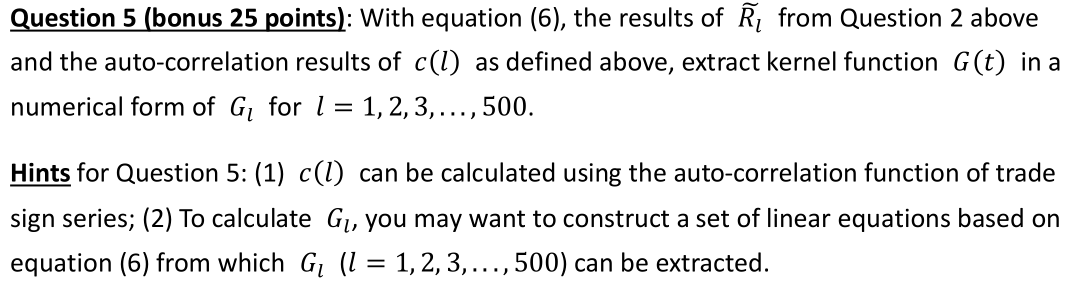

In [52]:
def calculate_auto_correlation(df, max_lag):
    # Extract the 'Sign' column
    sign_series = df['Sign']
    auto_correlation = []
    
    for lag in range(1, max_lag + 1):
        auto_correlation.append(sign_series.autocorr(lag=lag))
  
    return auto_correlation

max_lag = 500
c_l = calculate_auto_correlation(df, max_lag)

In [57]:
from scipy.linalg import solve

In [72]:
num_lags = 501
V_bar = df['Size'].mean()  # Assuming df and Size are correctly defined
alpha = 0.9
V_bar_alpha = V_bar ** alpha

A = np.zeros((num_lags, num_lags))
B = np.array(Rl_tilde_results) * V_bar_alpha  # Multiply each Rl_tilde by V̅^α

# Fill in the coefficients for matrix A based on the equation
for l in range(1, num_lags + 1):
    for t_prime in range(1, num_lags + 1):
        if t_prime <= l:
            # For 0 < t' ≤ l, use c(t' - l)
            A[l-1, t_prime-1] = c_l[abs(t_prime - l) - 1]
        else:
            # For t' > l, use c(t' - l)
            A[l-1, t_prime-1] = -c_l[abs(t_prime - l) - 1]  # Negative because of the subtraction in the equation

# Now, A and B are set up for solving the linear system AX = B

# Solve the system AX = B
G_l = solve(A, B)

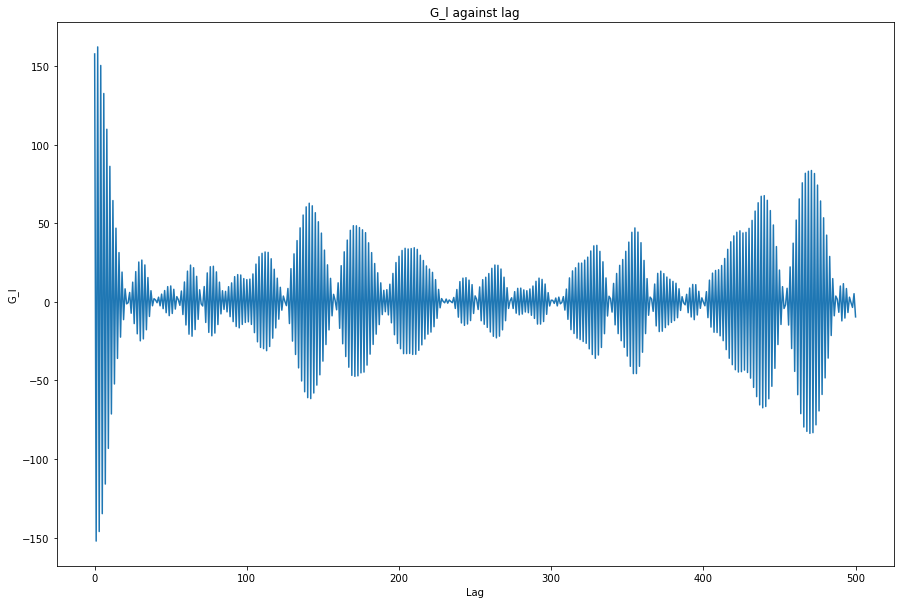

In [73]:
#plot G_l
plt.figure(figsize=(15, 10))
plt.plot(G_l)
plt.xlabel('Lag')
plt.ylabel('G_l')
plt.title('G_l against lag')
plt.show()